<a href="https://colab.research.google.com/github/Debo12/datascience.guvi-final-project/blob/master/Regression_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries and Load Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
stores = pd.read_csv('/content/drive/MyDrive/Guvi/Final Project/Datasets/Sales Forecasting/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/Guvi/Final Project/Datasets/Sales Forecasting/features.csv')
train = pd.read_csv('/content/drive/MyDrive/Guvi/Final Project/Datasets/Sales Forecasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Guvi/Final Project/Datasets/Sales Forecasting/test.csv')

# Data Preprocessing

### Merge the data of Features, Train and Store

In [54]:
train_data = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [55]:
train_data = pd.merge(train_data, stores, on='Store', how='left')
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [56]:
test_data = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'], how='left')
test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [57]:
test_data = pd.merge(test_data, stores, on='Store', how='left')
test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [59]:
train_data.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [61]:
test_data.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

### Remove NaN values with Mean value

In [62]:
train_data = train_data.fillna(train_data.mean())
train_data.info()

<ipython-input-62-0d84fdc9e573>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data = train_data.fillna(train_data.mean())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [63]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,A,151315


In [64]:
test_data = test_data.fillna(test_data.mean())
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     115064 non-null  float64
 7   MarkDown2     115064 non-null  float64
 8   MarkDown3     115064 non-null  float64
 9   MarkDown4     115064 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           115064 non-null  float64
 12  Unemployment  115064 non-null  float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


<ipython-input-64-9dae643c3c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data = test_data.fillna(test_data.mean())


In [65]:
test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,3734.051729,3838.35,150.57,6966.34,223.610984,6.573,A,151315


### Encode categorical variables

In [66]:
le = LabelEncoder()
train_data['Type'] = le.fit_transform(train_data['Type'])
train_data['IsHoliday'] = le.fit_transform(train_data['IsHoliday'])
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,0,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,0,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,0,151315


In [67]:
test_data['Type'] = le.fit_transform(test_data['Type'])
test_data['IsHoliday'] = le.fit_transform(test_data['IsHoliday'])
test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573,0,151315
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573,0,151315
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573,0,151315
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573,0,151315
4,1,1,2012-11-30,0,52.34,3.207,2460.03,3734.051729,3838.35,150.57,6966.34,223.610984,6.573,0,151315


### Scale numerical variables

In [68]:
scaler = StandardScaler()
train_data[['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']] = scaler.fit_transform(train_data[['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']])
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,-0.963798,-1.720834,0.0,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.018774,0.078201,0,0.239209
1,1,1,2010-02-12,46039.49,1,-1.169783,-1.773177,0.0,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.022498,0.078201,0,0.239209
2,1,1,2010-02-19,41595.55,0,-1.092810,-1.847330,0.0,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.023697,0.078201,0,0.239209
3,1,1,2010-02-26,19403.54,0,-0.729625,-1.744825,0.0,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.024476,0.078201,0,0.239209
4,1,1,2010-03-05,21827.90,0,-0.736672,-1.605243,0.0,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.025255,0.078201,0,0.239209


In [69]:
test_data[['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']] = scaler.fit_transform(test_data[['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']])
test_data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,0.073606,-0.816679,-0.086307,0.195956,-0.178653,0.039765,-0.060954,1.379278,-0.228458,0,0.242483
1,1,1,2012-11-09,0,0.389776,-1.117379,0.349063,-0.050340,-0.179453,0.180907,0.114758,1.379827,-0.228458,0,0.242483
2,1,1,2012-11-16,0,-0.054572,-1.376316,0.187720,-0.477113,-0.174630,-0.311620,0.138339,1.380765,-0.228458,0,0.242483
3,1,1,2012-11-23,1,0.122206,-1.547548,-0.636529,-0.517025,5.506860,-0.441036,-0.186133,1.382219,-0.228458,0,0.242483
4,1,1,2012-11-30,0,-0.085548,-1.564254,-0.489085,0.000000,0.109007,-0.449354,0.156526,1.383674,-0.228458,0,0.242483


### Split the data into training and testing sets

In [70]:
X = train_data.drop(['Store', 'Dept', 'Weekly_Sales', 'Date'], axis=1)
y = train_data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
138466,0,-1.612652,0.981373,0.00000,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,-0.948274,-0.162234,1,-0.213034
289214,0,1.269517,-1.511462,0.00000,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.019174,0.128649,2,-1.537211
52351,0,1.048896,-1.430767,0.00000,-9.342547e-17,-4.143412e-17,2.554510e-16,-2.544902e-16,1.059681,-0.465997,0,1.078657
203504,0,-0.616333,-0.412259,-0.77817,-6.762479e-01,-3.300196e-02,-8.588535e-01,1.117775e+00,1.204239,-0.278694,1,0.056396
233606,0,-1.476051,0.488477,0.01599,4.526620e+00,-2.252191e-01,-4.600584e-01,-3.826819e-01,-0.881116,0.374987,0,1.100205


# Exploratory Data Analysis (EDA)

### Visualize the sales and markdowns over time

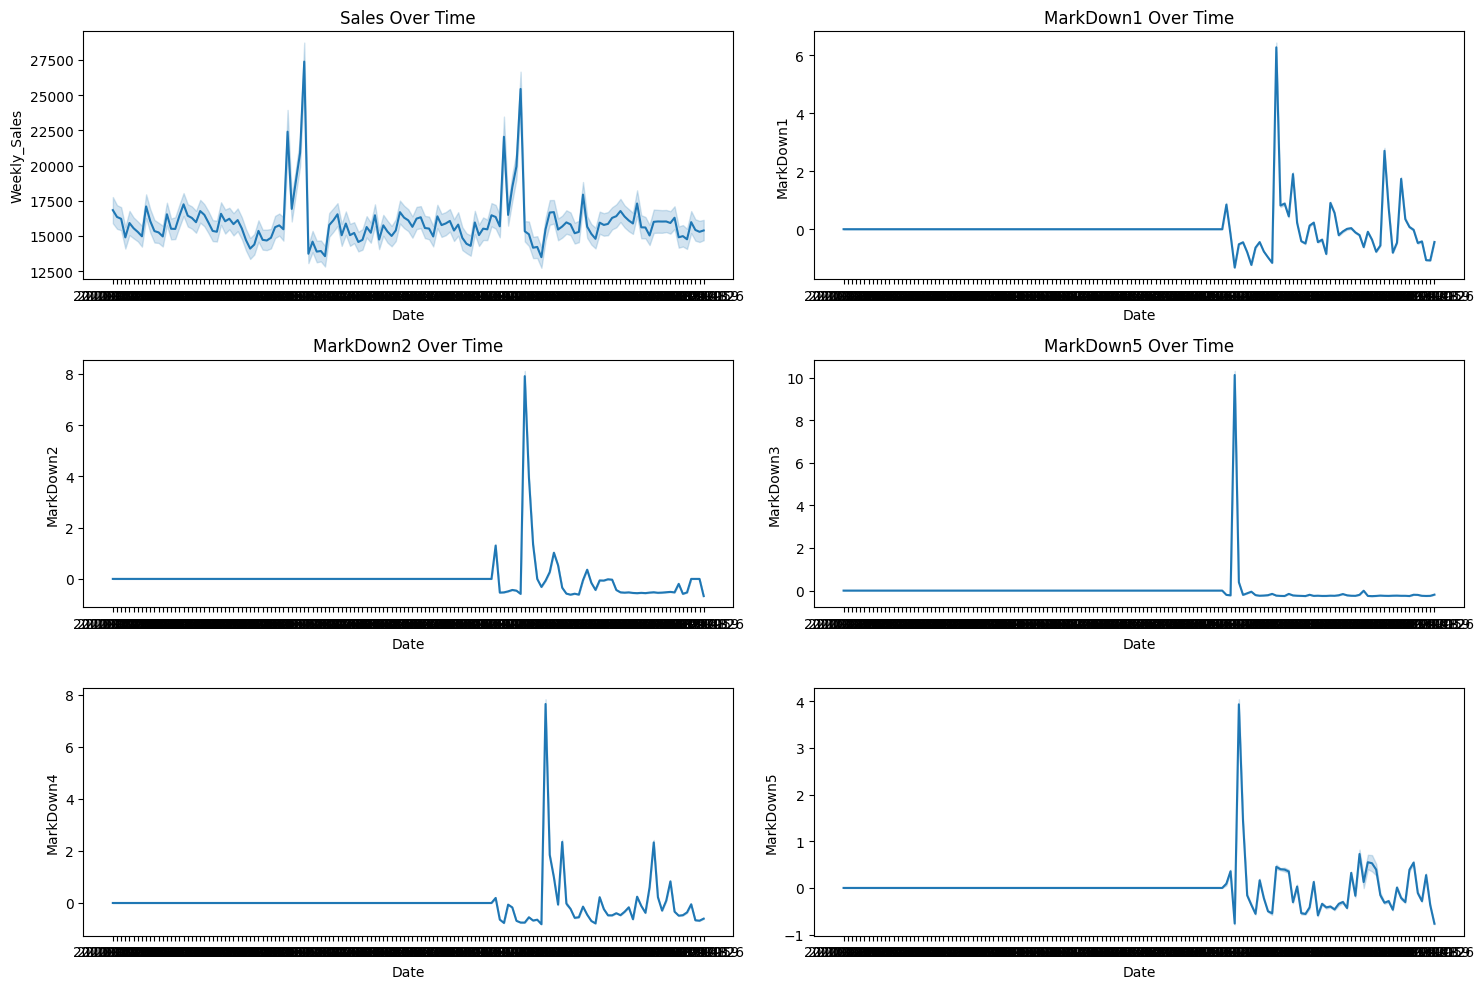

In [72]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
sns.lineplot(x='Date', y='Weekly_Sales', data=train_data, ax=axs[0][0])
axs[0][0].set_title('Sales Over Time')
sns.lineplot(x='Date', y='MarkDown1', data=train_data, ax=axs[0][1])
axs[0][1].set_title('MarkDown1 Over Time')
sns.lineplot(x='Date', y='MarkDown2', data=train_data, ax=axs[1][0])
axs[1][0].set_title('MarkDown2 Over Time')
sns.lineplot(x='Date', y='MarkDown3', data=train_data, ax=axs[1][1])
axs[1][1].set_title('MarkDown3 Over Time')
sns.lineplot(x='Date', y='MarkDown4', data=train_data, ax=axs[2][0])
axs[1][1].set_title('MarkDown4 Over Time')
sns.lineplot(x='Date', y='MarkDown5', data=train_data, ax=axs[2][1])
axs[1][1].set_title('MarkDown5 Over Time')
plt.tight_layout()
plt.show()

<ipython-input-73-446af5c81a9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


<Axes: >

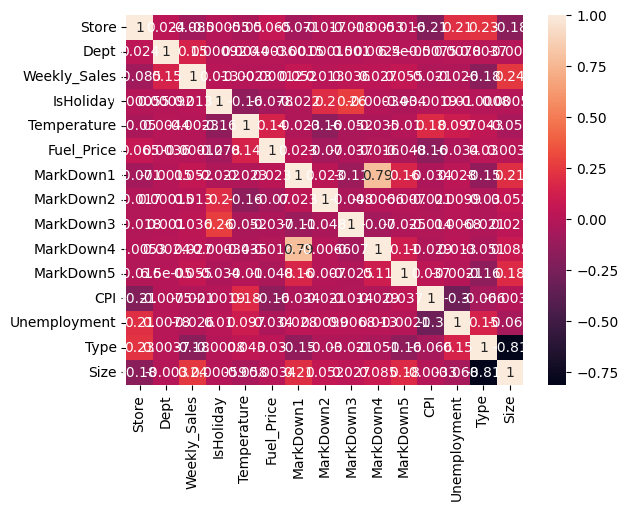

In [73]:
corr = train_data.corr()
sns.heatmap(corr, annot=True)

# Model Training and Evaluation

### Train and evaluate Linear Regression model

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Linear Regression')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Linear Regression
Mean Absolute Error: 14509.31273776964
Mean Squared Error: 487734251.6692737
R-squared: 0.06469533621095203


### Train and evaluate Random Forest Regression model

In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Regression')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Random Forest Regression
Mean Absolute Error: 14443.885967562235
Mean Squared Error: 482345484.2481345
R-squared: 0.07502911794519784



### Train and evaluate XGBoost Regression model

In [76]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGBoost Regression')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

XGBoost Regression
Mean Absolute Error: 14267.119578473032
Mean Squared Error: 471927487.59179664
R-squared: 0.09500721221818065
